###                                                             Wine Quality data preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/winequalityN.csv')
df.head(5)

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

In [3]:
df.tail(5)

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
6492  red            6.2             0.600         0.08             2.0   
6493  red            5.9             0.550         0.10             2.2   
6494  red            6.3             0.510         0.13             2.3   
6495  red            5.9             0.645         0.12             2.0   
6496  red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
6492      0.090                 32.0                  44.0  0.99490  3.45   
6493      0.062                 39.0                  51.0  0.99512  3.52   
6494      0.076                 29.0                  40.0  0.99574  3.42   
6495      0.075                 32.0                  44.0  0.99547  3.57   
6496      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  
6492       0.58     10.5        5  
6493        NaN     11.2        6  
6494       0.75     11.0        6  
6495       0.71     10.2        5  
6496       0.66     11.0        6

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6487.000000       6489.000000  6494.000000     6495.000000   
mean        7.216579          0.339691     0.318722        5.444326   
std         1.296750          0.164649     0.145265        4.758125   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6495.000000          6497.000000           6497.000000  6497.000000   
mean      0.056042            30.525319            115.744574     0.994697   
std       0.035036            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6488.000000  6493.000000  6497.000000  6497.000000  
mean      3.218395     0.531215    10.491801     5.818378  
std       0.160748     0.148814     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

### Checking for missing values

In [6]:
df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

### Replace missing values with mean of the corresponding column values

In [7]:
df.fillna(df.mean(), inplace=True)
df.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### One-hot-encoding the type column

In [8]:
df = pd.get_dummies(df)
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00   0.450000   
1                    14.0                 132.0  0.99400  3.30   0.490000   
2                    30.0                  97.0  0.99510  3.26   0.440000   
3                    47.0                 186.0  0.99560  3.19   0.400000   
4                    47.0                 186.0  0.99560  3.19   0.400000   
...                   ...                   ...      ...   ...        ...   
6492                 32.0                  44.0  0.99490  3.45   0.580000   
6493                 39.0                  51.0  0.99512  3.52   0.531215   
6494                 29.0                  40.0  0.99574  3.42   0.750000   
6495                 32.0                  44.0  0.99547  3.57   0.710000   
6496                 18.0                  42.0  0.99549  3.39   0.660000   

      alcohol  quality  type_red  type_white  
0         8.8        6         0           1  
1         9.5        6         0           1  
2        10.1        6         0           1  
3         9.9        6         0           1  
4         9.9        6         0           1  
...       ...      ...       ...         ...  
6492     10.5        5         1           0  
6493     11.2        6         1           0  
6494     11.0        6         1           0  
6495     10.2        5         1           0  
6496     11.0        6         1           0  

[6497 rows x 14 columns]

In [9]:
fig = px.histogram(df, x='quality')
fig.show()

In [10]:
X = df[df.columns.difference(df['quality'])]
Y = df['quality']
Y.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

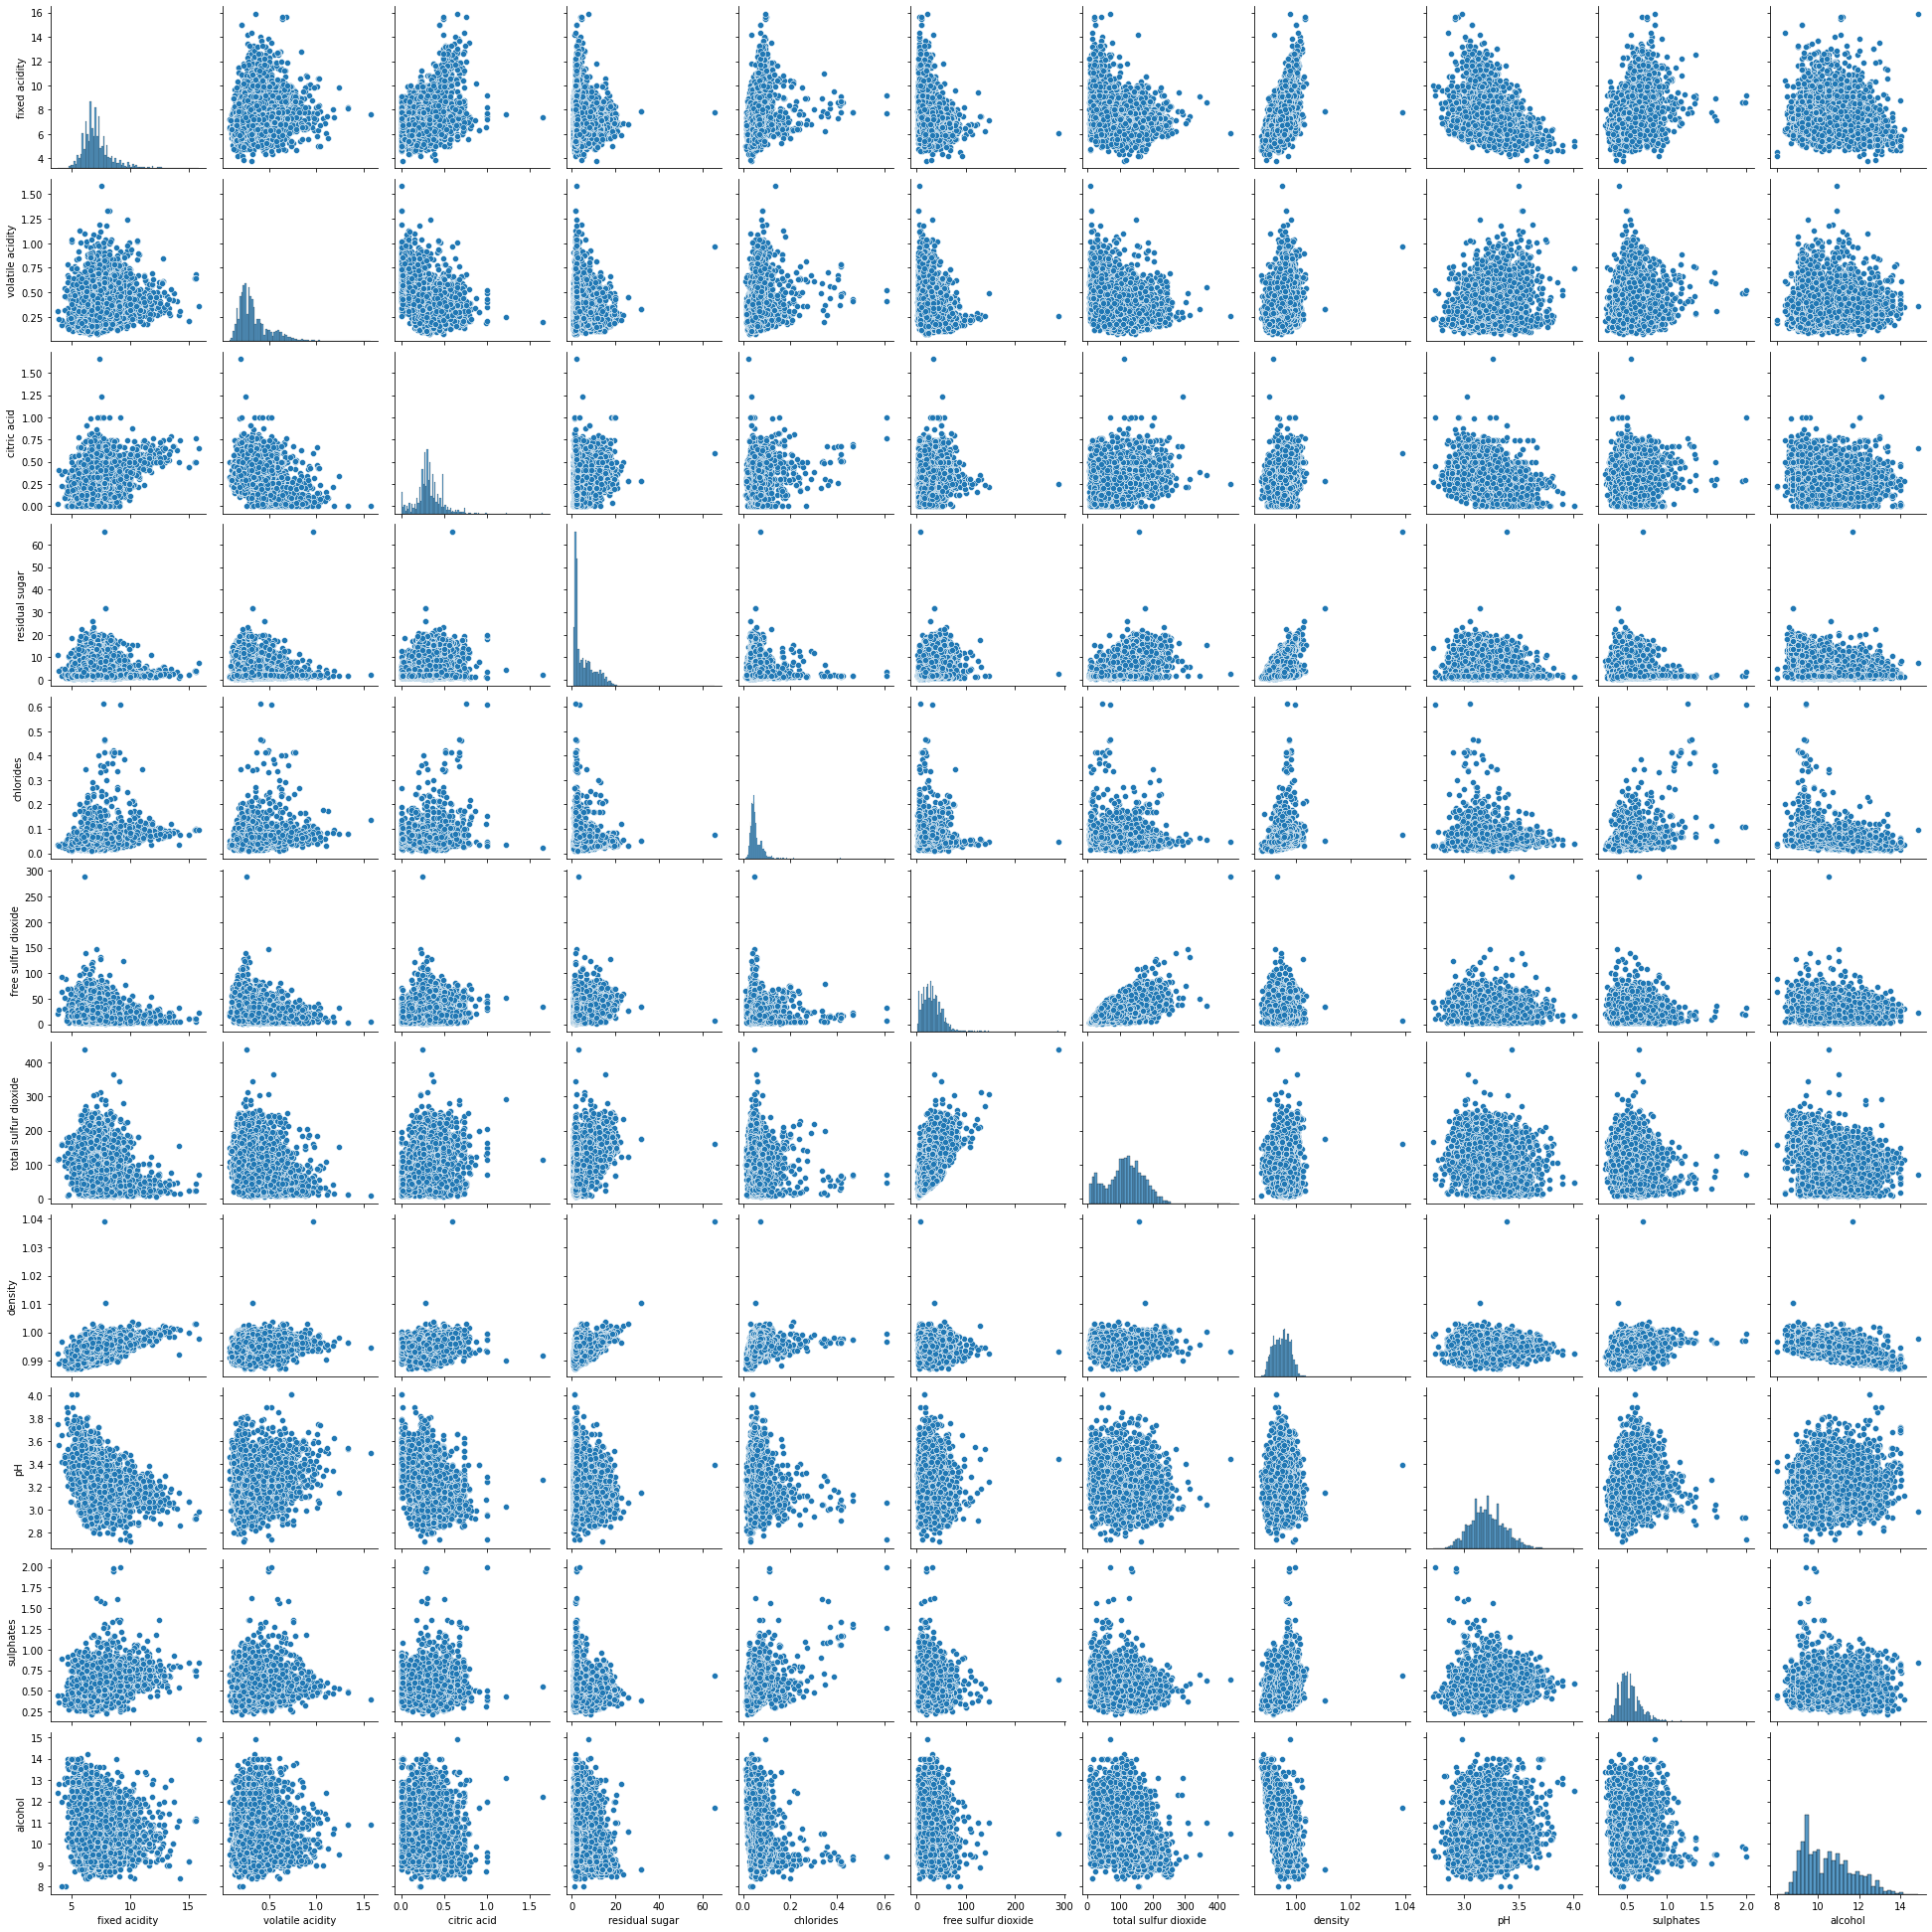

In [11]:
df_non_cat = df.drop(labels = ["quality", "type_red", "type_white" ],axis = 1)
sns.pairplot(df_non_cat)

### A we can see in the plots there are several outliers that can affect the result, so we will remove them from the data.

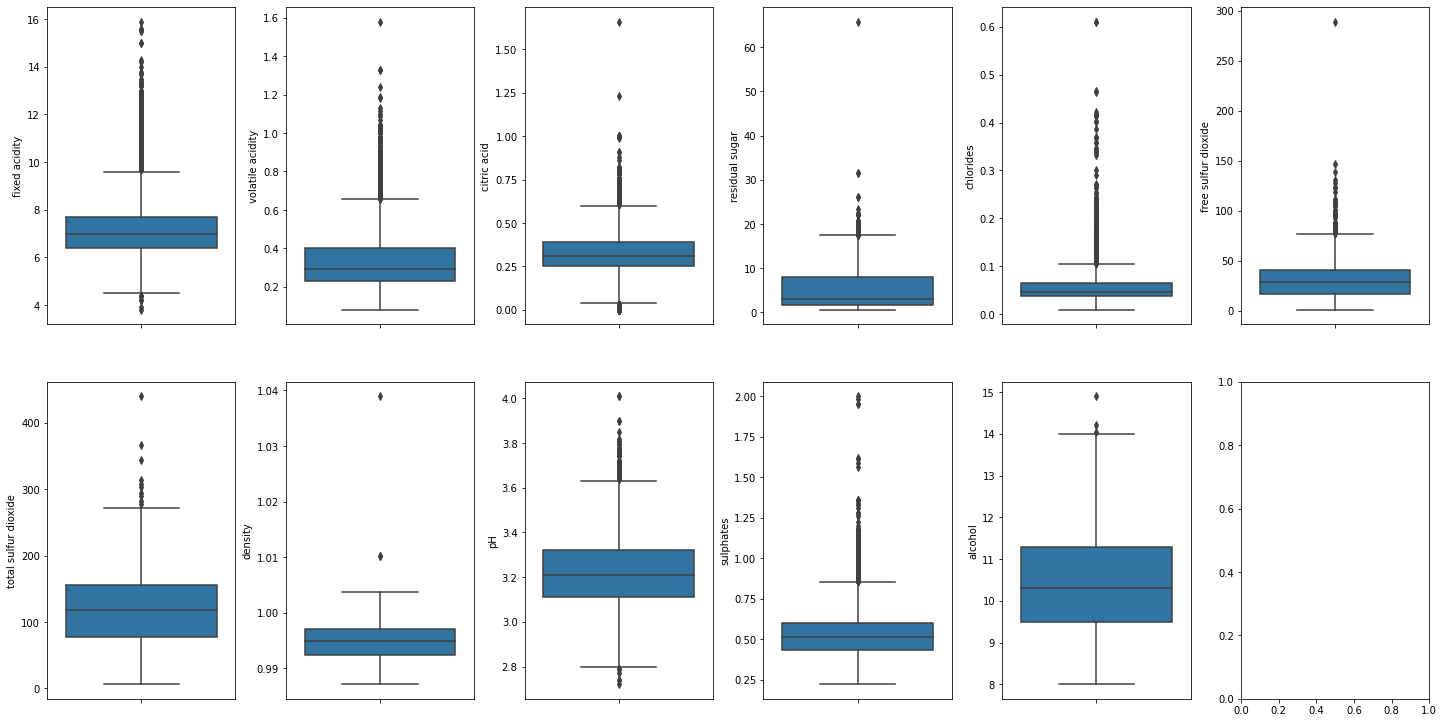

In [12]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'quality' and col != 'type_red' and col != 'type_white':
        sns.boxplot(y=col, data=df, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [13]:
df.drop(df[ (df["fixed acidity"] > 10) | (df["fixed acidity"] < 4.2) ].index , inplace=True)
df.drop(df[ (df["volatile acidity"] > 0.65) ].index , inplace=True)
df.drop(df[ (df["total sulfur dioxide"] > 280) ].index , inplace=True)
df.drop(df[ (df["density"] > 1.01) ].index , inplace=True)
df.drop(df[ (df["pH"] > 3.62) | (df["pH"] < 2.8) ].index , inplace=True)
df.drop(df[ (df["sulphates"] > 0.8) ].index , inplace=True)
df.drop(df[ (df["chlorides"] > 0.1) ].index , inplace=True)
df.drop(df[ (df["free sulfur dioxide"] > 75) ].index , inplace=True)
df.drop(df[ (df["citric acid"] > 0.6) | (df["citric acid"] < 0.05) ].index , inplace=True)
df.drop(df[ (df["residual sugar"] > 18) ].index , inplace=True)

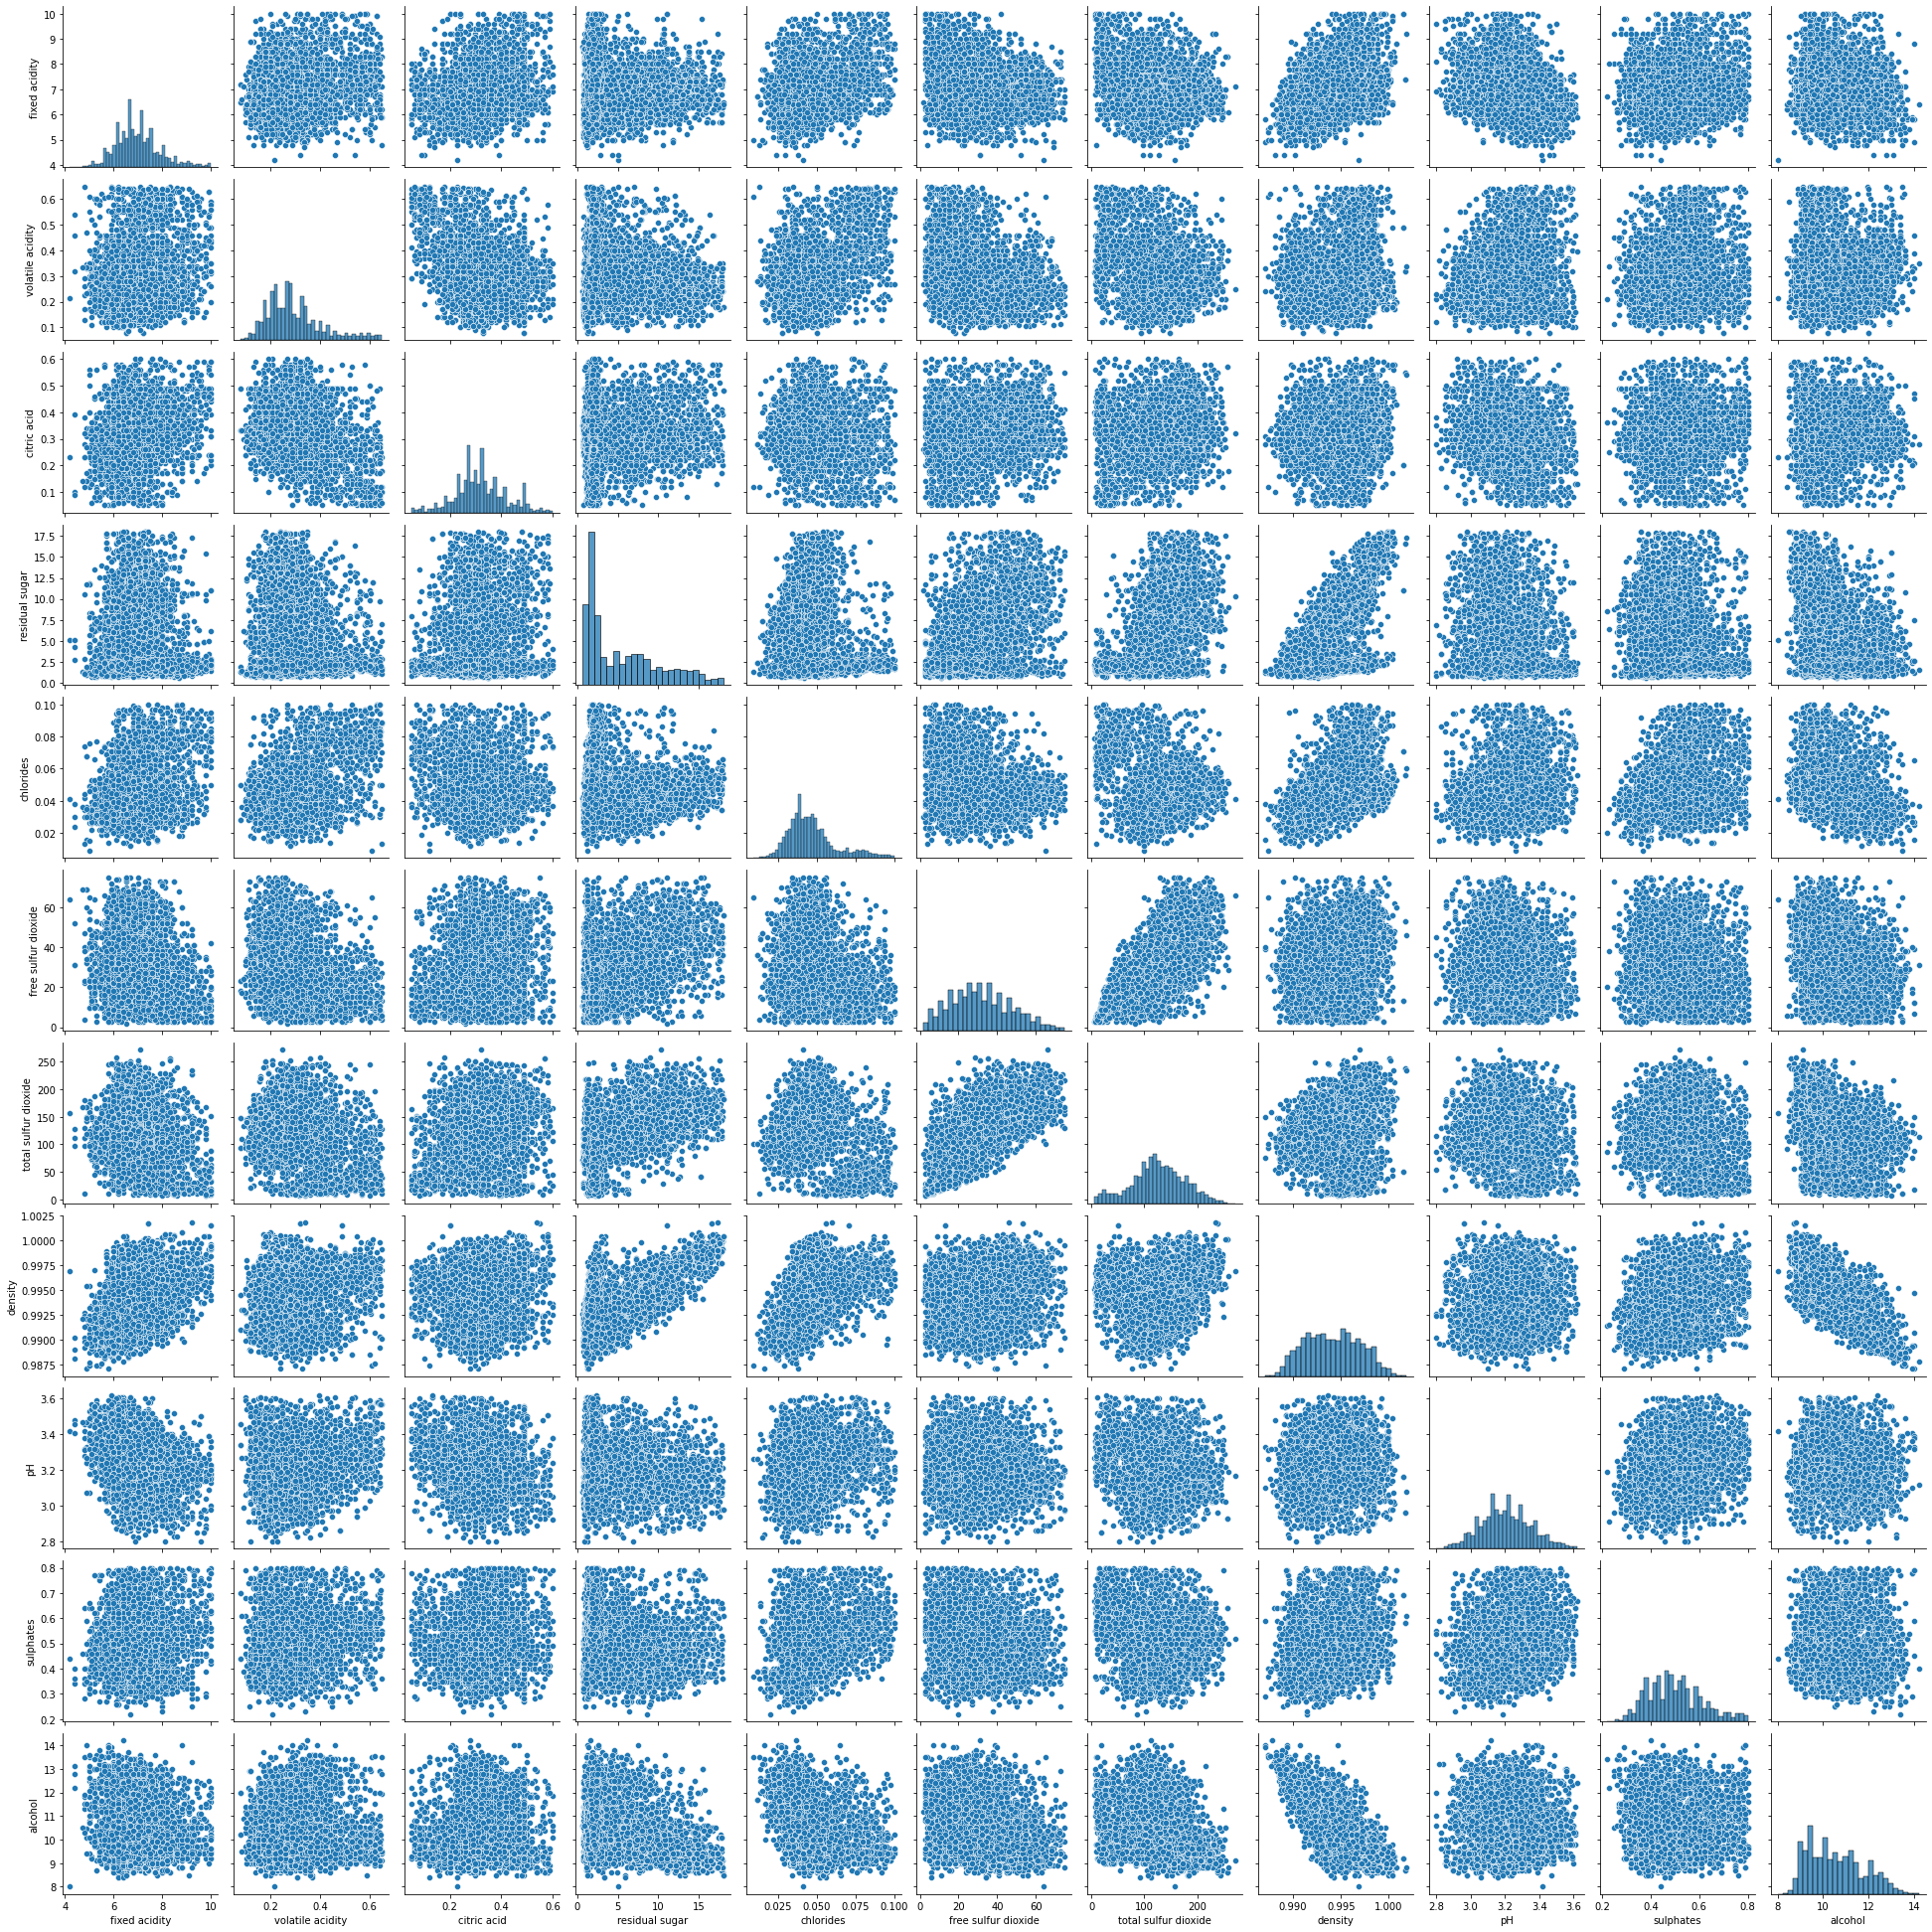

In [14]:
df_non_cat = df.drop(labels = ["quality", "type_red", "type_white" ],axis = 1)
sns.pairplot(df_non_cat)

### Checking the correlations

<AxesSubplot:>

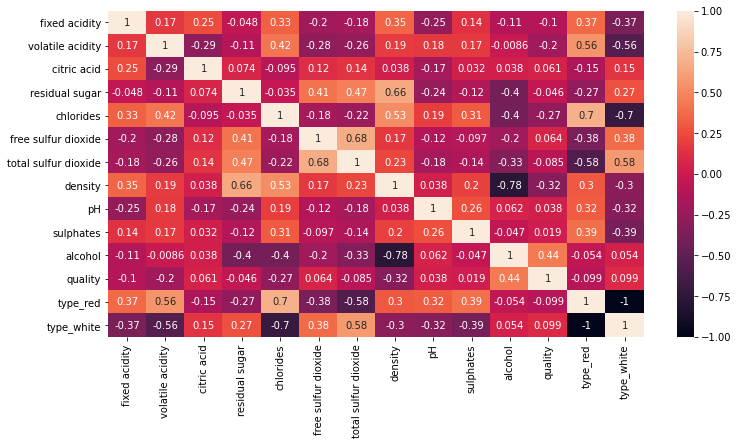

In [15]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

### Train-Test splitting

In [16]:
Y_orig = df["quality"].values
X_orig = df.drop(labels = ["quality" ],axis = 1)

X, X_test, Y, Y_test = train_test_split(X_orig, Y_orig ,test_size = 0.1, random_state=13)
X_train, X_vald, Y_train, Y_vald = train_test_split(X, Y ,test_size = 0.2, random_state=13)


### Model creation

In [17]:
def getModel(type):
    switcher = {
        "knn": KNeighborsClassifier(),
        "svc": svm.SVC(),
        "rf": RandomForestClassifier(),
        "lr": LogisticRegression(),
        "dt": DecisionTreeClassifier()
    }
  
    return switcher.get(type, None)

In [18]:
def get_trained_model(clf, x_train, y_train, scaler=None, param_grid=None, withHyperparameterTuning=False):
    if scaler is not None:
        x_train = pd.DataFrame(scaler.fit_transform(x_train), index=x_train.index, columns=x_train.columns)
    
    if withHyperparameterTuning:
        clf = GridSearchCV(clf, param_grid, cv=5, refit=True, n_jobs=3)

    clf.fit(x_train, y_train)
    if withHyperparameterTuning: 
        print("Best params: ", clf.best_params_)
        print("Best score: ", clf.best_score_)
        print(clf.best_estimator_)
        
    return clf

In [19]:
def predict(clf, x_test, y_test, scaler=None):
    if scaler is not None:
        x_test = pd.DataFrame(scaler.transform(x_test), index=x_test.index, columns=x_test.columns)
    
    y_pred = clf.predict(x_test)
    
    global accuracy
    accuracy = accuracy_score(y_test, y_pred)
    global precision
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    global recall 
    recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
    
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='macro', zero_division=0))    
    print("Recall:", recall_score(y_test, y_pred, average='macro', zero_division=0))
    print(classification_report(y_test, y_pred, zero_division=0))

### Logistic Regression


In [20]:
lr = "lr"
lr_scores_vald = {
    'Accuracy': [],
    'Precision': [],
    'Recall': []
}

lr_scores_test = {
    'Accuracy': [],
    'Precision': [],
    'Recall': []
}

In [21]:
# Hyperparameters to tune
lr_hyper_params  = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
    'max_iter': [100,110,120],
    'dual':[False],
    'multi_class': ['multinomial'],
    'C': [1.0,1.5,2.0]
}

In [22]:
print('LogisticRegression metrics without scaling...')
clf = get_trained_model(getModel(lr), X_train, Y_train)
predict(clf, X_vald, Y_vald)

lr_scores_vald['Accuracy'].append(accuracy)
lr_scores_vald['Precision'].append(precision)
lr_scores_vald['Recall'].append(recall)

print('Final test...')
predict(clf, X_test, Y_test)

lr_scores_test['Accuracy'].append(accuracy)
lr_scores_test['Precision'].append(precision)
lr_scores_test['Recall'].append(recall)

LogisticRegression metrics without scaling...
Accuracy: 0.4794215795328142
Precision: 0.23825630122905814
Recall: 0.1716857178647066
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        24
           5       0.48      0.36      0.41       266
           6       0.48      0.81      0.60       406
           7       0.71      0.03      0.05       178
           8       0.00      0.00      0.00        22
           9       0.00      0.00      0.00         2

    accuracy                           0.48       899
   macro avg       0.24      0.17      0.15       899
weighted avg       0.50      0.48      0.40       899

Final test...
Accuracy: 0.4529058116232465
Precision: 0.15741940287394832
Recall: 0.1907872989947306
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        16
      

In [23]:
print('LogisticRegression metrics using MinMaxScaler...')
scaler = MinMaxScaler()
clf = get_trained_model(getModel(lr), X_train, Y_train, scaler=scaler)
predict(clf, X_vald, Y_vald, scaler=scaler)

lr_scores_vald['Accuracy'].append(accuracy)
lr_scores_vald['Precision'].append(precision)
lr_scores_vald['Recall'].append(recall)

print('Final test...')
predict(clf, X_test, Y_test, scaler=scaler)

lr_scores_test['Accuracy'].append(accuracy)
lr_scores_test['Precision'].append(precision)
lr_scores_test['Recall'].append(recall)

LogisticRegression metrics using MinMaxScaler...
Accuracy: 0.5483870967741935
Precision: 0.24685102010187077
Recall: 0.2195418390443924
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        24
           5       0.57      0.56      0.56       266
           6       0.53      0.75      0.62       406
           7       0.63      0.23      0.34       178
           8       0.00      0.00      0.00        22
           9       0.00      0.00      0.00         2

    accuracy                           0.55       899
   macro avg       0.25      0.22      0.22       899
weighted avg       0.53      0.55      0.51       899

Final test...
Accuracy: 0.56312625250501
Precision: 0.2683289811636778
Recall: 0.26145483025367555
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        16
     

In [24]:
print('LogisticRegression metrics using StandardScaler...')
scaler = StandardScaler()
clf = get_trained_model(getModel(lr), X_train, Y_train, scaler=scaler)
predict(clf, X_vald, Y_vald, scaler=scaler)

lr_scores_vald['Accuracy'].append(accuracy)
lr_scores_vald['Precision'].append(precision)
lr_scores_vald['Recall'].append(recall)

print('Final test...')
predict(clf, X_test, Y_test, scaler=scaler)

lr_scores_test['Accuracy'].append(accuracy)
lr_scores_test['Precision'].append(precision)
lr_scores_test['Recall'].append(recall)

LogisticRegression metrics using StandardScaler...
Accuracy: 0.5472747497219133
Precision: 0.24077159256322153
Recall: 0.22380188030268286
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        24
           5       0.57      0.57      0.57       266
           6       0.53      0.71      0.61       406
           7       0.59      0.28      0.38       178
           8       0.00      0.00      0.00        22
           9       0.00      0.00      0.00         2

    accuracy                           0.55       899
   macro avg       0.24      0.22      0.22       899
weighted avg       0.52      0.55      0.52       899

Final test...
Accuracy: 0.5651302605210421
Precision: 0.27942593620967204
Recall: 0.270125623630139
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        16
 

In [25]:
print('LogisticRegression metrics using MinMaxScaler and Hyperparameters tuning')
scaler = MinMaxScaler()
clf = get_trained_model(getModel(lr), X_train, Y_train, scaler=scaler, param_grid=lr_hyper_params, withHyperparameterTuning=True)
predict(clf, X_vald, Y_vald, scaler=scaler)

lr_scores_vald['Accuracy'].append(accuracy)
lr_scores_vald['Precision'].append(precision)
lr_scores_vald['Recall'].append(recall)

print('Final test...')
predict(clf, X_test, Y_test, scaler=scaler)

lr_scores_test['Accuracy'].append(accuracy)
lr_scores_test['Precision'].append(precision)
lr_scores_test['Recall'].append(recall)

LogisticRegression metrics using MinMaxScaler and Hyperparameters tuning
Best params:  {'C': 1.5, 'dual': False, 'max_iter': 100, 'multi_class': 'multinomial', 'penalty': 'l1', 'solver': 'saga'}
Best score:  0.5375839238186741
LogisticRegression(C=1.5, multi_class='multinomial', penalty='l1',
                   solver='saga')
Accuracy: 0.5461624026696329
Precision: 0.24759277032327967
Recall: 0.2203754113240149
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        24
           5       0.56      0.56      0.56       266
           6       0.53      0.73      0.61       406
           7       0.65      0.25      0.36       178
           8       0.00      0.00      0.00        22
           9       0.00      0.00      0.00         2

    accuracy                           0.55       899
   macro avg       0.25      0.22      0.22       899
weighted avg       0.53      0.55      0.51

In [26]:
lr_scores_vald = pd.DataFrame(lr_scores_vald, index=['Without Scaling', 'MinMax Scaler', 'Standard Scaler', 'MinMaxScaler and Hyperparameters tuning'])
lr_scores_vald.drop_duplicates(inplace=True)
lr_scores_vald

Accuracy  Precision    Recall
Without Scaling                          0.479422   0.238256  0.171686
MinMax Scaler                            0.548387   0.246851  0.219542
Standard Scaler                          0.547275   0.240772  0.223802
MinMaxScaler and Hyperparameters tuning  0.546162   0.247593  0.220375

In [27]:
lr_scores_test = pd.DataFrame(lr_scores_test, index=['Without Scaling', 'MinMax Scaler', 'Standard Scaler', 'MinMaxScaler and Hyperparameters tuning'])
lr_scores_test.drop_duplicates(inplace=True)
lr_scores_test

Accuracy  Precision    Recall
Without Scaling                          0.452906   0.157419  0.190787
MinMax Scaler                            0.563126   0.268329  0.261455
Standard Scaler                          0.565130   0.279426  0.270126
MinMaxScaler and Hyperparameters tuning  0.563126   0.275331  0.265848

### Decision Tree


In [28]:
dt = "dt"
dt_params  = {
    'max_depth': list(range(8,20,2)),
    'max_features': list(range(1,15)),
    'criterion': ['gini', 'entropy']
}

dt_scores = {
    'Accuracy': [],
    'Precision': [],
    'Recall': []
}

dt_scores_test = {
    'Accuracy': [],
    'Precision': [],
    'Recall': []
}


In [29]:
print('Decision Tree metrics without scaling...')
clf = get_trained_model(getModel(dt), X_train, Y_train)
predict(clf, X_vald, Y_vald)
dt_scores['Accuracy'].append(accuracy)
dt_scores['Precision'].append(precision)
dt_scores['Recall'].append(recall)

print('Final test...')
predict(clf, X_test, Y_test)
dt_scores_test['Accuracy'].append(accuracy)
dt_scores_test['Precision'].append(precision)
dt_scores_test['Recall'].append(recall)

print('CV accuracy', cross_val_score(clf, X, Y, cv=5).mean())

Decision Tree metrics without scaling...
Accuracy: 0.578420467185762
Precision: 0.31565189173044866
Recall: 0.31878473745915986
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.19      0.12      0.15        24
           5       0.59      0.65      0.62       266
           6       0.63      0.59      0.61       406
           7       0.54      0.55      0.54       178
           8       0.27      0.32      0.29        22
           9       0.00      0.00      0.00         2

    accuracy                           0.58       899
   macro avg       0.32      0.32      0.32       899
weighted avg       0.58      0.58      0.58       899

Final test...
Accuracy: 0.6212424849699398
Precision: 0.4680382744495648
Recall: 0.44358024783471334
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.40      0.25      0.31        16
           

In [30]:
print('Decision Tree metrics using StandardScaler...')
scaler = StandardScaler()
clf = get_trained_model(getModel(dt), X_train, Y_train, scaler=scaler)
predict(clf, X_vald, Y_vald, scaler=scaler)
dt_scores['Accuracy'].append(accuracy)
dt_scores['Precision'].append(precision)
dt_scores['Recall'].append(recall)

print('Final test...')
predict(clf, X_test, Y_test, scaler=scaler)
dt_scores_test['Accuracy'].append(accuracy)
dt_scores_test['Precision'].append(precision)
dt_scores_test['Recall'].append(recall)

print('CV accuracy', cross_val_score(clf, X, Y, cv=5).mean())

Decision Tree metrics using StandardScaler...
Accuracy: 0.5873192436040044
Precision: 0.3108760997406845
Recall: 0.31698086637668255
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.12      0.08      0.10        24
           5       0.60      0.64      0.62       266
           6       0.63      0.61      0.62       406
           7       0.56      0.57      0.56       178
           8       0.26      0.32      0.29        22
           9       0.00      0.00      0.00         2

    accuracy                           0.59       899
   macro avg       0.31      0.32      0.31       899
weighted avg       0.58      0.59      0.59       899

Final test...
Accuracy: 0.6232464929859719
Precision: 0.4578631691834261
Recall: 0.42726714021030876
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.38      0.19      0.25        16
      

In [31]:
print('Decision Tree metrics using MinMaxScaler...')
scaler = MinMaxScaler()
clf = get_trained_model(getModel(dt), X_train, Y_train, scaler=scaler)
predict(clf, X_vald, Y_vald, scaler=scaler)
dt_scores['Accuracy'].append(accuracy)
dt_scores['Precision'].append(precision)
dt_scores['Recall'].append(recall)

print('Final test...')
predict(clf, X_test, Y_test, scaler=scaler)
dt_scores_test['Accuracy'].append(accuracy)
dt_scores_test['Precision'].append(precision)
dt_scores_test['Recall'].append(recall)

print('CV accuracy', cross_val_score(clf, X, Y, cv=5).mean())

Decision Tree metrics using MinMaxScaler...
Accuracy: 0.5862068965517241
Precision: 0.30360471666936917
Recall: 0.3103925900457378
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.05      0.04      0.05        24
           5       0.60      0.64      0.62       266
           6       0.64      0.62      0.63       406
           7       0.56      0.56      0.56       178
           8       0.28      0.32      0.30        22
           9       0.00      0.00      0.00         2

    accuracy                           0.59       899
   macro avg       0.30      0.31      0.31       899
weighted avg       0.58      0.59      0.58       899

Final test...
Accuracy: 0.6092184368737475
Precision: 0.43796549974632165
Recall: 0.4157292619568394
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.25      0.12      0.17        16
        

In [32]:
print('Decision Tree using StandardScaler and Hyperparameters tuning')
scaler = StandardScaler()
clf = get_trained_model(getModel(dt), X_train, Y_train, scaler=scaler, withHyperparameterTuning=True, param_grid=dt_params)
predict(clf, X_vald, Y_vald, scaler=scaler)
dt_scores['Accuracy'].append(accuracy)
dt_scores['Precision'].append(precision)
dt_scores['Recall'].append(recall)

print('Final test...')
predict(clf, X_test, Y_test, scaler=scaler)
dt_scores_test['Accuracy'].append(accuracy)
dt_scores_test['Precision'].append(precision)
dt_scores_test['Recall'].append(recall)


Decision Tree using StandardScaler and Hyperparameters tuning
Best params:  {'criterion': 'entropy', 'max_depth': 16, 'max_features': 4}
Best score:  0.5832404182534547
DecisionTreeClassifier(criterion='entropy', max_depth=16, max_features=4)
Accuracy: 0.5528364849833148
Precision: 0.28753102257252877
Recall: 0.30274304255180995
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.05      0.04      0.05        24
           5       0.56      0.64      0.60       266
           6       0.62      0.55      0.58       406
           7       0.53      0.52      0.52       178
           8       0.26      0.36      0.30        22
           9       0.00      0.00      0.00         2

    accuracy                           0.55       899
   macro avg       0.29      0.30      0.29       899
weighted avg       0.56      0.55      0.55       899

Final test...
Accuracy: 0.56312625250501
Precision: 0.32670919147882804


In [33]:
dt_scores = pd.DataFrame(dt_scores, index=['Without Scaling', 'MinMax Scaler', 'Standard Scaler', 'Standard Scaler and Hyperparameters tuning'])
dt_scores.drop_duplicates(inplace=True)
dt_scores

Accuracy  Precision    Recall
Without Scaling                             0.578420   0.315652  0.318785
MinMax Scaler                               0.587319   0.310876  0.316981
Standard Scaler                             0.586207   0.303605  0.310393
Standard Scaler and Hyperparameters tuning  0.552836   0.287531  0.302743

In [34]:
dt_scores_test = pd.DataFrame(dt_scores_test, index=['Without Scaling', 'MinMax Scaler', 'Standard Scaler', 'Standard Scaler and Hyperparameters tuning'])
dt_scores_test.drop_duplicates(inplace=True)
dt_scores_test

Accuracy  Precision    Recall
Without Scaling                             0.621242   0.468038  0.443580
MinMax Scaler                               0.623246   0.457863  0.427267
Standard Scaler                             0.609218   0.437965  0.415729
Standard Scaler and Hyperparameters tuning  0.563126   0.326709  0.321909

### Random Forest

In [35]:
rf = 'rf'
rf_scores = {
    'Accuracy': [],
    'Precision': [],
    'Recall': []    
}

rf_scores_test = {
    'Accuracy': [],
    'Precision': [],
    'Recall': []
}

In [36]:
print('Random forest metrics without scaling...')
clf = get_trained_model(getModel(rf), X_train, Y_train)
predict(clf, X_vald, Y_vald)

rf_scores['Accuracy'].append(accuracy)
rf_scores['Precision'].append(precision)
rf_scores['Recall'].append(recall)

print('Final test...')
predict(clf, X_test, Y_test)

rf_scores_test['Accuracy'].append(accuracy)
rf_scores_test['Precision'].append(precision)
rf_scores_test['Recall'].append(recall)

print('CV accuracy', cross_val_score(clf, X, Y, cv=5).mean())

Random forest metrics without scaling...
Accuracy: 0.6662958843159066
Precision: 0.5275408711090677
Recall: 0.3206278270713137
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       1.00      0.04      0.08        24
           5       0.69      0.69      0.69       266
           6       0.64      0.79      0.71       406
           7       0.74      0.49      0.59       178
           8       0.62      0.23      0.33        22
           9       0.00      0.00      0.00         2

    accuracy                           0.67       899
   macro avg       0.53      0.32      0.34       899
weighted avg       0.68      0.67      0.65       899

Final test...
Accuracy: 0.6793587174348698
Precision: 0.572296594159712
Recall: 0.41798367294505967
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.50      0.06      0.11        16
           5 

In [37]:
print('Random forest metrics using MinMaxScaler...')
scaler = MinMaxScaler()
clf = get_trained_model(getModel(rf), X_train, Y_train, scaler=scaler)
predict(clf, X_vald, Y_vald, scaler=scaler)

rf_scores['Accuracy'].append(accuracy)
rf_scores['Precision'].append(precision)
rf_scores['Recall'].append(recall)

print('Final test...')
predict(clf, X_test, Y_test, scaler=scaler)

rf_scores_test['Accuracy'].append(accuracy)
rf_scores_test['Precision'].append(precision)
rf_scores_test['Recall'].append(recall)

print('CV accuracy', cross_val_score(clf, X, Y, cv=5).mean())

Random forest metrics using MinMaxScaler...
Accuracy: 0.6718576195773082
Precision: 0.5273241078571245
Recall: 0.32212164020047246
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       1.00      0.04      0.08        24
           5       0.70      0.69      0.70       266
           6       0.64      0.81      0.72       406
           7       0.72      0.49      0.58       178
           8       0.62      0.23      0.33        22
           9       0.00      0.00      0.00         2

    accuracy                           0.67       899
   macro avg       0.53      0.32      0.34       899
weighted avg       0.68      0.67      0.66       899

Final test...
Accuracy: 0.6693386773547094
Precision: 0.6468760023395784
Recall: 0.4121130823317644
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       1.00      0.06      0.12        16
         

In [38]:
print('Random forest metrics using StandardScaler...')
scaler = StandardScaler()
clf = get_trained_model(getModel(rf), X_train, Y_train, scaler=scaler)
predict(clf, X_vald, Y_vald, scaler=scaler)

rf_scores['Accuracy'].append(accuracy)
rf_scores['Precision'].append(precision)
rf_scores['Recall'].append(recall)

print('Final test...')
predict(clf, X_test, Y_test, scaler=scaler)

rf_scores_test['Accuracy'].append(accuracy)
rf_scores_test['Precision'].append(precision)
rf_scores_test['Recall'].append(recall)

print('CV accuracy', cross_val_score(clf, X, Y, cv=5).mean())

Random forest metrics using StandardScaler...
Accuracy: 0.6629588431590656
Precision: 0.5271709557423844
Recall: 0.31596660574434826
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       1.00      0.04      0.08        24
           5       0.69      0.69      0.69       266
           6       0.63      0.81      0.71       406
           7       0.74      0.45      0.56       178
           8       0.62      0.23      0.33        22
           9       0.00      0.00      0.00         2

    accuracy                           0.66       899
   macro avg       0.53      0.32      0.34       899
weighted avg       0.68      0.66      0.65       899

Final test...
Accuracy: 0.6773547094188377
Precision: 0.6501488095238095
Recall: 0.40622783314122685
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       1.00      0.06      0.12        16
      

In [39]:
rf_scores = pd.DataFrame(rf_scores, index=['Without Scaling', 'MinMax Scaler', 'Standard Scaler'])
rf_scores.drop_duplicates(inplace=True)
rf_scores

Accuracy  Precision    Recall
Without Scaling  0.666296   0.527541  0.320628
MinMax Scaler    0.671858   0.527324  0.322122
Standard Scaler  0.662959   0.527171  0.315967

In [40]:
rf_scores_test = pd.DataFrame(rf_scores_test, index=['Without Scaling', 'MinMax Scaler', 'Standard Scaler'])
rf_scores_test.drop_duplicates(inplace=True)
rf_scores_test

Accuracy  Precision    Recall
Without Scaling  0.679359   0.572297  0.417984
MinMax Scaler    0.669339   0.646876  0.412113
Standard Scaler  0.677355   0.650149  0.406228

### KNN

In [41]:
knn = "knn"
knn_scores = {
    'Accuracy': [],
    'Precision': [],
    'Recall': []
}

knn_scores_test = {
    'Accuracy': [],
    'Precision': [],
    'Recall': []
}

In [42]:
# Hyperparameters to tune
knn_params  = {'leaf_size': list(range(1,5)), 
               'n_neighbors': list(range(1,10)),
               'p': [1,2]}                          


In [43]:
print('KNN metrics without scaling...')
clf = get_trained_model(getModel(knn), X_train, Y_train, param_grid=knn_params)
predict(clf, X_vald, Y_vald)

knn_scores['Accuracy'].append(accuracy)
knn_scores['Precision'].append(precision)
knn_scores['Recall'].append(recall)

print('Final test...')
predict(clf, X_test, Y_test)

knn_scores_test['Accuracy'].append(accuracy)
knn_scores_test['Precision'].append(precision)
knn_scores_test['Recall'].append(recall)

KNN metrics without scaling...
Accuracy: 0.4593993325917686
Precision: 0.21430576392756762
Recall: 0.20188412443629136
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.12      0.08      0.10        24
           5       0.44      0.50      0.47       266
           6       0.49      0.57      0.53       406
           7       0.45      0.26      0.33       178
           8       0.00      0.00      0.00        22
           9       0.00      0.00      0.00         2

    accuracy                           0.46       899
   macro avg       0.21      0.20      0.20       899
weighted avg       0.44      0.46      0.44       899

Final test...
Accuracy: 0.46893787575150303
Precision: 0.3118085499343522
Recall: 0.2547066845071726
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        16
           5       0

In [44]:
print('KNN metrics using MinMaxScaler...')
scaler = MinMaxScaler()
clf = get_trained_model(getModel(knn), X_train, Y_train, scaler=scaler)
predict(clf, X_vald, Y_vald, scaler=scaler)

knn_scores['Accuracy'].append(accuracy)
knn_scores['Precision'].append(precision)
knn_scores['Recall'].append(recall)

print('Final test...')
predict(clf, X_test, Y_test, scaler=scaler)

knn_scores_test['Accuracy'].append(accuracy)
knn_scores_test['Precision'].append(precision)
knn_scores_test['Recall'].append(recall)

KNN metrics using MinMaxScaler...
Accuracy: 0.5661846496106785
Precision: 0.2884827794404242
Recall: 0.25562697072362844
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.11      0.04      0.06        24
           5       0.57      0.60      0.58       266
           6       0.58      0.66      0.62       406
           7       0.56      0.44      0.49       178
           8       0.20      0.05      0.07        22
           9       0.00      0.00      0.00         2

    accuracy                           0.57       899
   macro avg       0.29      0.26      0.26       899
weighted avg       0.55      0.57      0.55       899

Final test...
Accuracy: 0.5370741482965932
Precision: 0.3186235605353252
Recall: 0.29445916331403527
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        16
           5      

In [45]:
print('KNN metrics using StandardScaler...')
scaler = StandardScaler()
clf = get_trained_model(getModel(knn), X_train, Y_train, scaler=scaler)
predict(clf, X_vald, Y_vald, scaler=scaler)

knn_scores['Accuracy'].append(accuracy)
knn_scores['Precision'].append(precision)
knn_scores['Recall'].append(recall)

print('Final test...')
predict(clf, X_test, Y_test, scaler=scaler)

knn_scores_test['Accuracy'].append(accuracy)
knn_scores_test['Precision'].append(precision)
knn_scores_test['Recall'].append(recall)

KNN metrics using StandardScaler...
Accuracy: 0.5617352614015573
Precision: 0.2764020487477838
Recall: 0.2533181045192622
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.11      0.04      0.06        24
           5       0.56      0.60      0.58       266
           6       0.58      0.66      0.61       406
           7       0.58      0.43      0.49       178
           8       0.11      0.05      0.06        22
           9       0.00      0.00      0.00         2

    accuracy                           0.56       899
   macro avg       0.28      0.25      0.26       899
weighted avg       0.55      0.56      0.55       899

Final test...
Accuracy: 0.5490981963927856
Precision: 0.34842135162381577
Recall: 0.29758799705954214
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        16
           5    

In [46]:
print('KNN metrics using MinMaxScaler and Hyperparameters tuning')
scaler = StandardScaler()
clf = get_trained_model(getModel(knn), X_train, Y_train, scaler=scaler, withHyperparameterTuning=True, param_grid=knn_params)
predict(clf, X_vald, Y_vald, scaler=scaler)

knn_scores['Accuracy'].append(accuracy)
knn_scores['Precision'].append(precision)
knn_scores['Recall'].append(recall)

print('Final test...')
predict(clf, X_test, Y_test, scaler=scaler)

knn_scores_test['Accuracy'].append(accuracy)
knn_scores_test['Precision'].append(precision)
knn_scores_test['Recall'].append(recall)

KNN metrics using MinMaxScaler and Hyperparameters tuning
Best params:  {'leaf_size': 1, 'n_neighbors': 1, 'p': 1}
Best score:  0.6121919564855243
KNeighborsClassifier(leaf_size=1, n_neighbors=1, p=1)
Accuracy: 0.6184649610678532
Precision: 0.36004223459718815
Recall: 0.36217887954916506
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.35      0.25      0.29        24
           5       0.62      0.66      0.64       266
           6       0.66      0.65      0.66       406
           7       0.61      0.56      0.58       178
           8       0.28      0.41      0.33        22
           9       0.00      0.00      0.00         2

    accuracy                           0.62       899
   macro avg       0.36      0.36      0.36       899
weighted avg       0.62      0.62      0.62       899

Final test...
Accuracy: 0.6212424849699398
Precision: 0.4404408423544685
Recall: 0.45174707254269864
             

In [47]:
knn_scores = pd.DataFrame(knn_scores, index=['Without Scaling', 'MinMax Scaler', 'Standard Scaler', 'MinMaxScaler and Hyperparameters tuning'])
knn_scores.drop_duplicates(inplace=True)
knn_scores

Accuracy  Precision    Recall
Without Scaling                          0.459399   0.214306  0.201884
MinMax Scaler                            0.566185   0.288483  0.255627
Standard Scaler                          0.561735   0.276402  0.253318
MinMaxScaler and Hyperparameters tuning  0.618465   0.360042  0.362179

In [48]:
knn_scores_test = pd.DataFrame(knn_scores_test, index=['Without Scaling', 'MinMax Scaler', 'Standard Scaler', 'MinMaxScaler and Hyperparameters tuning'])
knn_scores_test.drop_duplicates(inplace=True)
knn_scores_test

Accuracy  Precision    Recall
Without Scaling                          0.468938   0.311809  0.254707
MinMax Scaler                            0.537074   0.318624  0.294459
Standard Scaler                          0.549098   0.348421  0.297588
MinMaxScaler and Hyperparameters tuning  0.621242   0.440441  0.451747

### SVM

In [49]:
svc = "svc"
svm_scores = {
    'Accuracy': [],
    'Precision': [],
    'Recall': []
}

svm_scores_test = {
    'Accuracy': [],
    'Precision': [],
    'Recall': []
}

In [50]:
print('SVM metrics without scaling...')
clf = get_trained_model(getModel(svc), X_train, Y_train)
predict(clf, X_vald, Y_vald)

svm_scores['Accuracy'].append(accuracy)
svm_scores['Precision'].append(precision)
svm_scores['Recall'].append(recall)

print('Final test...')
predict(clf, X_test, Y_test)

svm_scores_test['Accuracy'].append(accuracy)
svm_scores_test['Precision'].append(precision)
svm_scores_test['Recall'].append(recall)

SVM metrics without scaling...
Accuracy: 0.45161290322580644
Precision: 0.06451612903225806
Recall: 0.14285714285714285
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        24
           5       0.00      0.00      0.00       266
           6       0.45      1.00      0.62       406
           7       0.00      0.00      0.00       178
           8       0.00      0.00      0.00        22
           9       0.00      0.00      0.00         2

    accuracy                           0.45       899
   macro avg       0.06      0.14      0.09       899
weighted avg       0.20      0.45      0.28       899

Final test...
Accuracy: 0.4348697394789579
Precision: 0.07247828991315965
Recall: 0.16666666666666666
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        16
           5      

In [51]:
print('SVM metrics using MinMaxScaler...')
scaler = MinMaxScaler()
clf = get_trained_model(getModel(svc), X_train, Y_train, scaler=scaler)
predict(clf, X_vald, Y_vald, scaler=scaler)

svm_scores['Accuracy'].append(accuracy)
svm_scores['Precision'].append(precision)
svm_scores['Recall'].append(recall)

print('Final test...')
predict(clf, X_test, Y_test, scaler=scaler)

svm_scores_test['Accuracy'].append(accuracy)
svm_scores_test['Precision'].append(precision)
svm_scores_test['Recall'].append(recall)

SVM metrics using MinMaxScaler...
Accuracy: 0.560622914349277
Precision: 0.2547753196666921
Recall: 0.22091787835670987
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        24
           5       0.60      0.58      0.59       266
           6       0.54      0.78      0.63       406
           7       0.65      0.19      0.29       178
           8       0.00      0.00      0.00        22
           9       0.00      0.00      0.00         2

    accuracy                           0.56       899
   macro avg       0.25      0.22      0.22       899
weighted avg       0.55      0.56      0.52       899

Final test...
Accuracy: 0.5831663326653307
Precision: 0.28596442164348745
Recall: 0.26882579596074424
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        16
           5      

In [52]:
print('SVM metrics using StandardScaler...')
scaler = StandardScaler()
clf = get_trained_model(getModel(svc), X_train, Y_train, scaler=scaler)
predict(clf, X_vald, Y_vald, scaler=scaler)

svm_scores['Accuracy'].append(accuracy)
svm_scores['Precision'].append(precision)
svm_scores['Recall'].append(recall)

print('Final test...')
predict(clf, X_test, Y_test, scaler=scaler)

svm_scores_test['Accuracy'].append(accuracy)
svm_scores_test['Precision'].append(precision)
svm_scores_test['Recall'].append(recall)

SVM metrics using StandardScaler...
Accuracy: 0.5706340378197998
Precision: 0.25795860615204697
Recall: 0.22994380565905267
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        24
           5       0.60      0.58      0.59       266
           6       0.55      0.77      0.64       406
           7       0.66      0.26      0.37       178
           8       0.00      0.00      0.00        22
           9       0.00      0.00      0.00         2

    accuracy                           0.57       899
   macro avg       0.26      0.23      0.23       899
weighted avg       0.55      0.57      0.54       899

Final test...
Accuracy: 0.6032064128256514
Precision: 0.30476514868732113
Recall: 0.292885382285897
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        16
           5    

## HyperParameter Tuning

In [53]:
param_grid = {'C': [ 0.001, 0.01, 0.1, 1], 
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['linear']} 

In [54]:
print('SVM metrics using StandardScaler and hyperparameters tuning with kernel linear...')
scaler = StandardScaler()
clf = get_trained_model(getModel(svc), X_train, Y_train, scaler=scaler, withHyperparameterTuning=True, param_grid=param_grid)
predict(clf, X_vald, Y_vald, scaler=scaler)

svm_scores['Accuracy'].append(accuracy)
svm_scores['Precision'].append(precision)
svm_scores['Recall'].append(recall)

print('Final test...')
predict(clf, X_test, Y_test, scaler=scaler)

svm_scores_test['Accuracy'].append(accuracy)
svm_scores_test['Precision'].append(precision)
svm_scores_test['Recall'].append(recall)

SVM metrics using StandardScaler and hyperparameters tuning with kernel linear...
Best params:  {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
Best score:  0.5289538627232965
SVC(C=0.1, gamma=1, kernel='linear')
Accuracy: 0.5150166852057843
Precision: 0.15024630541871922
Recall: 0.18958109559613318
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        24
           5       0.55      0.54      0.55       266
           6       0.50      0.79      0.61       406
           7       0.00      0.00      0.00       178
           8       0.00      0.00      0.00        22
           9       0.00      0.00      0.00         2

    accuracy                           0.52       899
   macro avg       0.15      0.19      0.17       899
weighted avg       0.39      0.52      0.44       899

Final test...
Accuracy: 0.5470941883767535
Precision: 0.1942097026604069
Recall: 0.23721052324563963
      

In [55]:
param_grid_rbf = {'C': [ 0.01, 0.1, 1], 
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf']} 

In [56]:
print('SVM metrics using StandardScaler and hyperparameters tuning with kernel rbf...')
scaler = StandardScaler()
clf = get_trained_model(getModel(svc), X_train, Y_train, scaler=scaler, withHyperparameterTuning=True, param_grid=param_grid_rbf)
predict(clf, X_vald, Y_vald, scaler=scaler)

svm_scores['Accuracy'].append(accuracy)
svm_scores['Precision'].append(precision)
svm_scores['Recall'].append(recall)

print('Final test...')
predict(clf, X_test, Y_test, scaler=scaler)

svm_scores_test['Accuracy'].append(accuracy)
svm_scores_test['Precision'].append(precision)
svm_scores_test['Recall'].append(recall)

SVM metrics using StandardScaler and hyperparameters tuning with kernel rbf...
Best params:  {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Best score:  0.6311295865117523
SVC(C=1, gamma=1)
Accuracy: 0.6318131256952169
Precision: 0.5330139097486036
Recall: 0.2904967409920465
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       1.00      0.04      0.08        24
           5       0.72      0.54      0.62       266
           6       0.58      0.85      0.69       406
           7       0.77      0.42      0.54       178
           8       0.67      0.18      0.29        22
           9       0.00      0.00      0.00         2

    accuracy                           0.63       899
   macro avg       0.53      0.29      0.32       899
weighted avg       0.67      0.63      0.61       899

Final test...
Accuracy: 0.6232464929859719
Precision: 0.4835167714884696
Recall: 0.3605277072734127
              precision    recall  f

In [57]:
svm_scores = pd.DataFrame(svm_scores, index=['Without Scaling', 'MinMax Scaler', 'Standard Scaler', 'MinMaxScaler and Hyperparameters tuning, kernel = linear', 'MinMaxScaler and Hyperparameters tuning, kernel = rbf'])
svm_scores.drop_duplicates(inplace=True)
svm_scores

Accuracy  Precision  \
Without Scaling                                     0.451613   0.064516   
MinMax Scaler                                       0.560623   0.254775   
Standard Scaler                                     0.570634   0.257959   
MinMaxScaler and Hyperparameters tuning, kernel...  0.515017   0.150246   
MinMaxScaler and Hyperparameters tuning, kernel...  0.631813   0.533014   

                                                      Recall  
Without Scaling                                     0.142857  
MinMax Scaler                                       0.220918  
Standard Scaler                                     0.229944  
MinMaxScaler and Hyperparameters tuning, kernel...  0.189581  
MinMaxScaler and Hyperparameters tuning, kernel...  0.290497

In [58]:
svm_scores_test = pd.DataFrame(svm_scores_test, index=['Without Scaling', 'MinMax Scaler', 'Standard Scaler', 'MinMaxScaler and Hyperparameters tuning, kernel = linear', 'MinMaxScaler and Hyperparameters tuning, kernel = rbf'])
svm_scores_test.drop_duplicates(inplace=True)
svm_scores_test

Accuracy  Precision  \
Without Scaling                                     0.434870   0.072478   
MinMax Scaler                                       0.583166   0.285964   
Standard Scaler                                     0.603206   0.304765   
MinMaxScaler and Hyperparameters tuning, kernel...  0.547094   0.194210   
MinMaxScaler and Hyperparameters tuning, kernel...  0.623246   0.483517   

                                                      Recall  
Without Scaling                                     0.166667  
MinMax Scaler                                       0.268826  
Standard Scaler                                     0.292885  
MinMaxScaler and Hyperparameters tuning, kernel...  0.237211  
MinMaxScaler and Hyperparameters tuning, kernel...  0.360528

# Final Results

To decide which model is the best we consider the following:
1. We compare each model Validation data Accurancy with Test data Accurancy and see if they are close to each other. 
2. The best model within each model group will be the one that has close enough accuracy values meanwile test data accuracy is the highest 

### For Logistic Regression models we have the following results:

In [59]:
lr_scores_vald

Accuracy  Precision    Recall
Without Scaling                          0.479422   0.238256  0.171686
MinMax Scaler                            0.548387   0.246851  0.219542
Standard Scaler                          0.547275   0.240772  0.223802
MinMaxScaler and Hyperparameters tuning  0.546162   0.247593  0.220375

In [60]:
lr_scores_test

Accuracy  Precision    Recall
Without Scaling                          0.452906   0.157419  0.190787
MinMax Scaler                            0.563126   0.268329  0.261455
Standard Scaler                          0.565130   0.279426  0.270126
MinMaxScaler and Hyperparameters tuning  0.563126   0.275331  0.265848

As we can see in the above tables, the acuuracy scores for all models has around ~0.02 difference.
The highest accuracy score is in the Standard Scaler model, so our best model for Logistic Regression: Model with StandardScaler with 0.565130 score

### For Decision Tree models we have the following results:

In [61]:
dt_scores

Accuracy  Precision    Recall
Without Scaling                             0.578420   0.315652  0.318785
MinMax Scaler                               0.587319   0.310876  0.316981
Standard Scaler                             0.586207   0.303605  0.310393
Standard Scaler and Hyperparameters tuning  0.552836   0.287531  0.302743

In [62]:
dt_scores_test

Accuracy  Precision    Recall
Without Scaling                             0.621242   0.468038  0.443580
MinMax Scaler                               0.623246   0.457863  0.427267
Standard Scaler                             0.609218   0.437965  0.415729
Standard Scaler and Hyperparameters tuning  0.563126   0.326709  0.321909

As we can see in the above tables, the acuuracy scores for all models has around 0.01~0.03 difference.
The highest accuracy score is in the Standard Scaler model, so our best model for Decision Tree: Model with StandardScaler with 0.607214 score

### For Random Forest models we have the following results:

In [63]:
rf_scores

Accuracy  Precision    Recall
Without Scaling  0.666296   0.527541  0.320628
MinMax Scaler    0.671858   0.527324  0.322122
Standard Scaler  0.662959   0.527171  0.315967

In [64]:
rf_scores_test

Accuracy  Precision    Recall
Without Scaling  0.679359   0.572297  0.417984
MinMax Scaler    0.669339   0.646876  0.412113
Standard Scaler  0.677355   0.650149  0.406228

As we can see in the above tables, the acuuracy scores for all models has around ~0.01 difference.
The highest accuracy score is in the Standard Scaler model, so our best model for Random Forest: Model with StandardScaler with 0.677355 score.

### For knn models we have the following results:

In [65]:
knn_scores

Accuracy  Precision    Recall
Without Scaling                          0.459399   0.214306  0.201884
MinMax Scaler                            0.566185   0.288483  0.255627
Standard Scaler                          0.561735   0.276402  0.253318
MinMaxScaler and Hyperparameters tuning  0.618465   0.360042  0.362179

In [66]:
knn_scores_test

Accuracy  Precision    Recall
Without Scaling                          0.468938   0.311809  0.254707
MinMax Scaler                            0.537074   0.318624  0.294459
Standard Scaler                          0.549098   0.348421  0.297588
MinMaxScaler and Hyperparameters tuning  0.621242   0.440441  0.451747

As we can see in the above tables, the acuuracy scores for all models has around 0.01~0.03 difference.
The highest accuracy score is in the model with hyperparameters tuning and MinMaxScaler, so our best model for KNN: Model with hyperparameters tuning and MinMaxScaler with 0.621242 score.

### For svm models we have the following results:

In [67]:
svm_scores

Accuracy  Precision  \
Without Scaling                                     0.451613   0.064516   
MinMax Scaler                                       0.560623   0.254775   
Standard Scaler                                     0.570634   0.257959   
MinMaxScaler and Hyperparameters tuning, kernel...  0.515017   0.150246   
MinMaxScaler and Hyperparameters tuning, kernel...  0.631813   0.533014   

                                                      Recall  
Without Scaling                                     0.142857  
MinMax Scaler                                       0.220918  
Standard Scaler                                     0.229944  
MinMaxScaler and Hyperparameters tuning, kernel...  0.189581  
MinMaxScaler and Hyperparameters tuning, kernel...  0.290497

In [68]:
svm_scores_test

Accuracy  Precision  \
Without Scaling                                     0.434870   0.072478   
MinMax Scaler                                       0.583166   0.285964   
Standard Scaler                                     0.603206   0.304765   
MinMaxScaler and Hyperparameters tuning, kernel...  0.547094   0.194210   
MinMaxScaler and Hyperparameters tuning, kernel...  0.623246   0.483517   

                                                      Recall  
Without Scaling                                     0.166667  
MinMax Scaler                                       0.268826  
Standard Scaler                                     0.292885  
MinMaxScaler and Hyperparameters tuning, kernel...  0.237211  
MinMaxScaler and Hyperparameters tuning, kernel...  0.360528

As we can see in the above tables, the acuuracy scores for all models has around 0.01~0.03 difference.
The highest accuracy score is in the model with hyperparameters tuning, MinMaxScaler and rbf kernel, so our best model for SVM: Model with hyperparameters tuning, MinMaxScaler and rbf kernel with 0.623246 score.

### Conclusion
The Best model on this Data set, according to the research, will be considered the one with the highest accuracy, which is Random Forest model with 0.677355 score.